## Day34.YOLO 細節理解 - 損失函數
今天的課程，我們講述了
* 損失函數是描述模型預測出來的結果和實際的差異的依據    
* YOLO 損失函數的設計包含物件位置的定位與物件類別辨識    
* YOLO損失函數透過超參數設定模型有不同的辨識能力    



### 作業
仔細觀察，bbox 寬高計算損失方式和bbox中心計算損失方式有哪邊不一樣嗎? 為什麼要有不同的設計?
![title](HW_answer.png)



#### bbox 寬高計算損失方式 是寬(w)與高(h)開根號相減後的平方和
$\lambda_{\text {coord }} \sum_{i=0}^{S^{2}} \sum_{j=0}^{n} \mathbb{1}_{i j}^{\text {onj }}\left[(\sqrt{w_{i}}-\sqrt{\hat{w}_{i}})^{2}+(\sqrt{h_{i}}-\sqrt{\hat{h}_{i}})^{2}\right]$
<br>

#### bbox中心計算損失方式 為中心點距離平方
$\lambda_{\text {coord }} \sum_{i=0}^{S^{2}} \sum_{j=0}^{B} I_{i j}^{\text {alij }}\left[\left(x_{i}-\hat{x}_{i}\right)^{2}+\left(y_{i}-\hat{y}_{i}\right)^{2}\right]$

在D27：Bounding Box Regression原理:
我們希望框的偏移量不會因為物件的大小而受影響，因此要是我們只是純粹相減兩個框的距離的話，很明顯物件越大其得到的值也會越大。

假設大框$Ground\ Truth\ box\ w_{i}=10 , h_{i}=20$, &nbsp; $Predict\ \hat{w}_{i}=8, \hat{h}_{i}=22$, &nbsp; $Loss=(10-8)^2+(20-22)^2=8$<br>
假設小框$Ground\ Truth\ box\ w_{i}=3 , h_{i}=5$, &nbsp; $Predict\ \hat{w}_{i}=1, \hat{h}_{i}=7$, &nbsp; $Loss=(3-1)^2+(5-7)^2=8$

大框明顯比小框的誤差要小, 但是當不開根號Loss是相同的<br>
開根號後大框Loss為0.116<br>
小框Loss為0.322

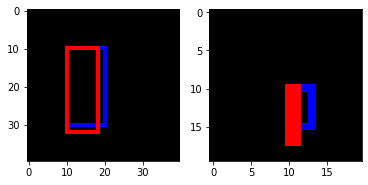

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

ground = np.zeros((40,40,3))
cv2.rectangle(ground, (10,10), (20,30), (0,0,255), 1)
cv2.rectangle(ground, (10,10), (18,32), (255,0,0), 1)
plt.subplot(1,2,1)
plt.imshow(ground.astype('uint8'))

ground = np.zeros((20,20,3))
cv2.rectangle(ground, (10,10), (13,15), (0,0,255), 1)
cv2.rectangle(ground, (10,10), (11,17), (255,0,0), 1)
plt.subplot(1,2,2)
plt.imshow(ground.astype('uint8'))

### [You Only Look Once: Unified, Real-Time Object Detection](https://arxiv.org/abs/1506.02640)
__Sum-squared error also equally weights errors in large boxes and small boxes__.<br>
Our error metric should reflect that small deviations in __large boxes matter less than in small boxes__.<br>
To partially address this __we predict the square root of the bounding box width and height instead of the widthand height directly.__